# Simultaneous Astrometry

The following results have been obtained from the simultaneous astrometry fit running on 20 full foccal plane CFHT Megacam images (36 CCD). All non blended measured sources (stars + galaxies) with magnitude < 22.5 and Flux/Sigma_Flux > 10 have been kept. This is ~230 sources / CCD / visit.<BR>
The sources are matched to the USNO reference catalog<BR>
There are 100 iterations to get rid of most of the outliers (note that this will be much faster if we are able to implement a rank update algorithm)
<H3>Timing and memory :</H3>
<UL>
<LI> ~6 minutes to read the 20*36 = 720 catalogs + WCS + metadata and run the source selection on my laptop with SSD (twice slower on GPFS / spinning disks at CC-IN2P3)
<LI> ~11 s / iteration to fit positions + distorsion parameters (3rd degree polynomial)
<LI> ~2.3 GB maximum virtual memory
</UL>

In [1]:
%matplotlib inline  
import croaks
import matplotlib.pyplot as plt
import numpy

nt = croaks.NTuple.fromtxt("/home/boutigny/LSST/CFHT/D3/res_0-meas.list") 

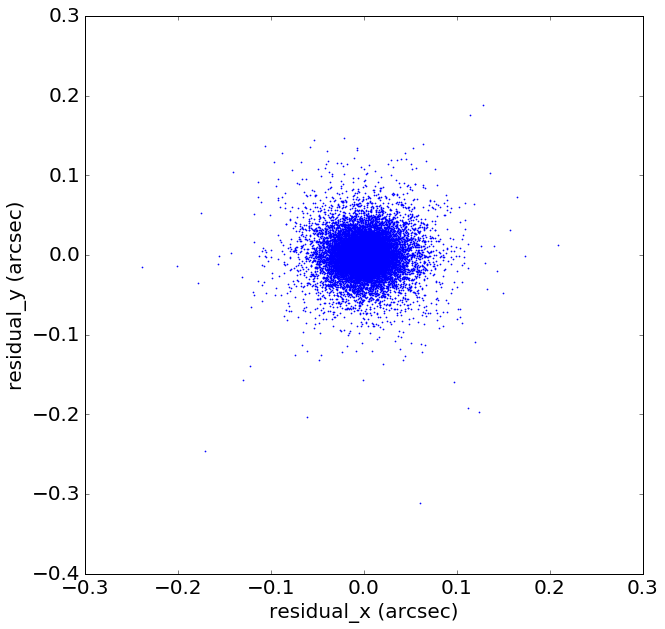

In [2]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 10))
ax0.scatter(3600*nt['rx'],3600*nt['ry'], s=0.5, color='blue')
ax0.set_xlabel("residual_x (arcsec)", fontsize=20)
ax0.set_ylabel("residual_y (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)

0.0179550603808 0.0173821403952


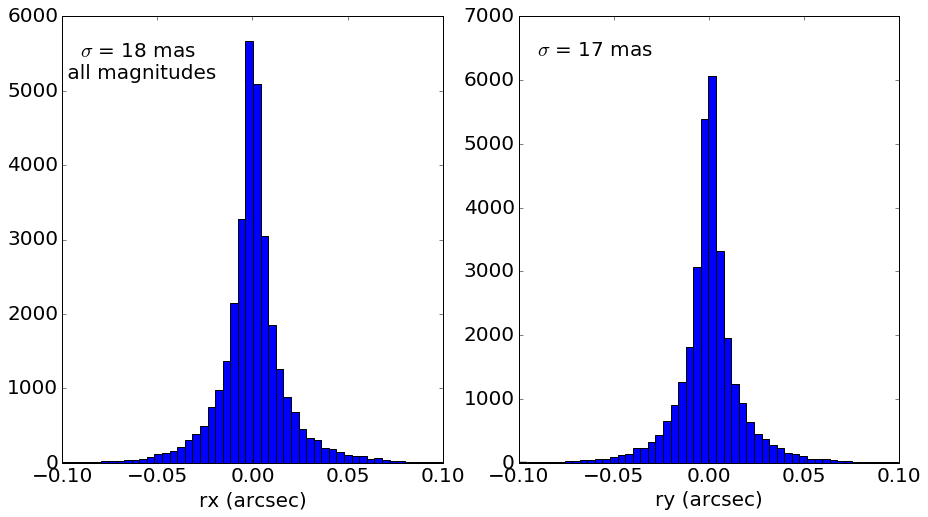

In [3]:
idxs = numpy.where(abs(3600*nt['rx']) < 0.1)
idys = numpy.where(abs(3600*nt['ry']) < 0.1)

sigmaX = numpy.std(3600*nt['rx'][idxs])
sigmaY = numpy.std(3600*nt['ry'][idys])
print sigmaX, sigmaY

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.hist(3600*nt['rx'][idxs],bins=50)
ax1.hist(3600*nt['ry'][idys],bins=50)
ax0.set_xlabel("rx (arcsec)", fontsize=20)
ax1.set_xlabel("ry (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

ax0.set_title("$\sigma$ = %.0f mas\n all magnitudes"%(sigmaX*1000), x=0.2, y=0.85, fontsize=20)
ax1.set_title("$\sigma$ = %.0f mas"%(sigmaY*1000), x=0.2, y=0.9, fontsize=20)

0.00366543787576 0.00336223049966


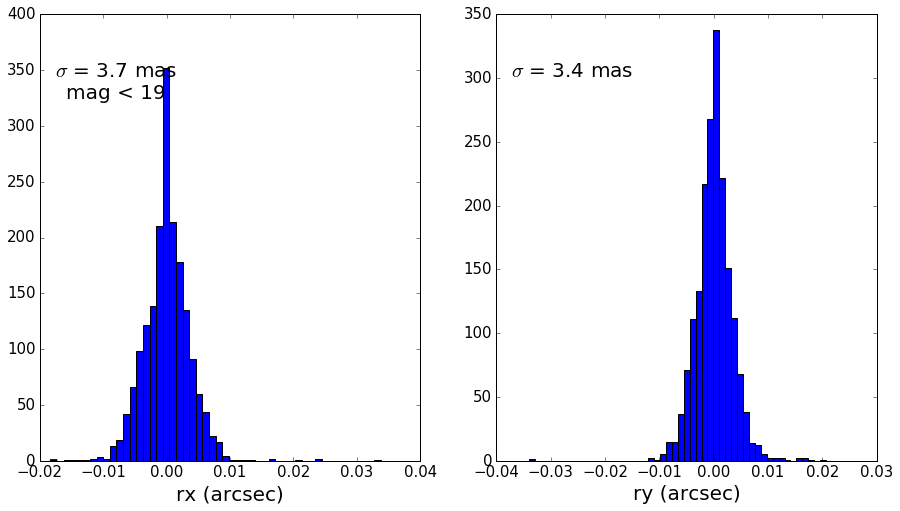

In [4]:
idxs = numpy.where( (abs(3600*nt['rx']) < 0.04) & (nt['mag']<19) )
idys = numpy.where( (abs(3600*nt['ry']) < 0.04)  & (nt['mag']<19) )

sigmaX = numpy.std(3600*nt['rx'][idxs])
sigmaY = numpy.std(3600*nt['ry'][idys])
print sigmaX, sigmaY

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.hist(3600*nt['rx'][idxs],bins=50)
ax1.hist(3600*nt['ry'][idys],bins=50)
ax0.set_xlabel("rx (arcsec)", fontsize=20)
ax1.set_xlabel("ry (arcsec)", fontsize=20)
ax0.tick_params(labelsize=15)
ax1.tick_params(labelsize=15)

ax0.set_title("$\sigma$ = %.1f mas\nmag < 19"%(sigmaX*1000), x=0.2, y=0.8, fontsize=20)
ax1.set_title("$\sigma$ = %.1f mas"%(sigmaY*1000), x=0.2, y=0.85, fontsize=20)

In [ ]:
for i in nt :
    if 3600*i['rx'] > 0.2 and 3600*i['ry'] > 0.12 :
        print 3600*i['rx'], 3600*i['ry'], i['jd'], i['ra'], i['dec'], i['mag'], i['chip'], i['shoot'], i['chi2'], i['xccd'], i['yccd'], i['nm']

In [ ]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
idx = numpy.where(3600*nt['rx']**2+3600*nt['ry']**2>0.0001)
ax0.scatter(nt['shoot'][idx], 3600*nt['rx'][idx]**2+3600*nt['ry'][idx]**2, s=5)
ax1.scatter(nt['chip'][idx], 3600*nt['rx'][idx]**2+3600*nt['ry'][idx]**2, s=5)

In [ ]:
fig, (ax0) = plt.subplots(ncols=1, figsize=(15, 8))
ax0.scatter(nt['mag'],nt['nm'])

id =numpy.where(nt['nm']==1)
print nt['chi2'][id]
print 3600*nt['ry'][id]

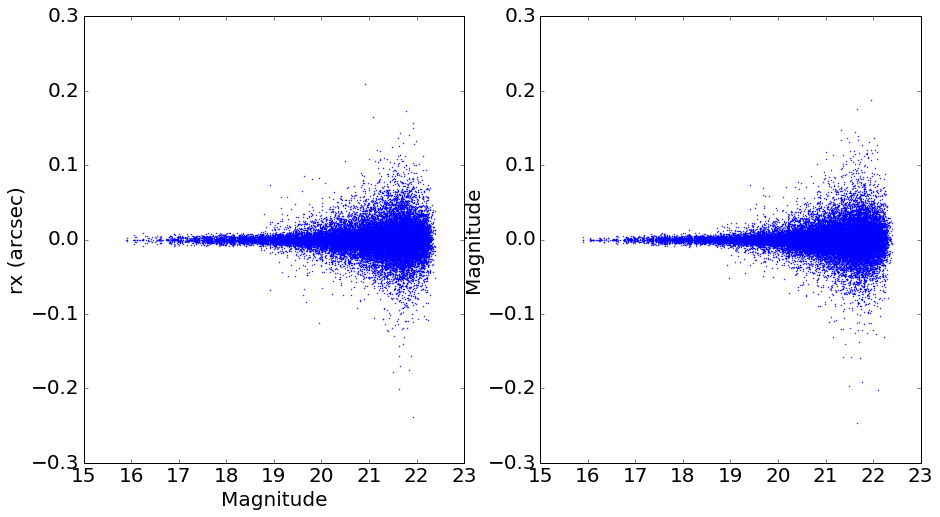

In [5]:
ix = numpy.where( (abs(3600*nt['rx']) < 0.3) & (abs(3600*nt['ry']) < 0.3))
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.scatter(nt['mag'][ix], 3600*nt['rx'][ix], s=0.2, color='blue')
ax1.scatter(nt['mag'][ix], 3600*nt['ry'][ix], s=0.2, color = 'blue')
ax0.set_ylabel("rx (arcsec)", fontsize=20)
ax0.set_xlabel("Magnitude", fontsize=20)
ax1.set_ylabel("ry (arcsec)", fontsize=20)
ax1.set_ylabel("Magnitude", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

In [ ]:
idsel = numpy.where(((3600*nt['rx']) > 0.5) & (((3600*nt['ry']) > 0.5)))
print 3600*nt['rx'][idsel]
print 3600*nt['ry'][idsel]
print nt['jd'][idsel]
print nt['nm'][idsel]
print nt['shoot'][idsel]
print nt['chip'][idsel]
print nt['mag'][idsel]


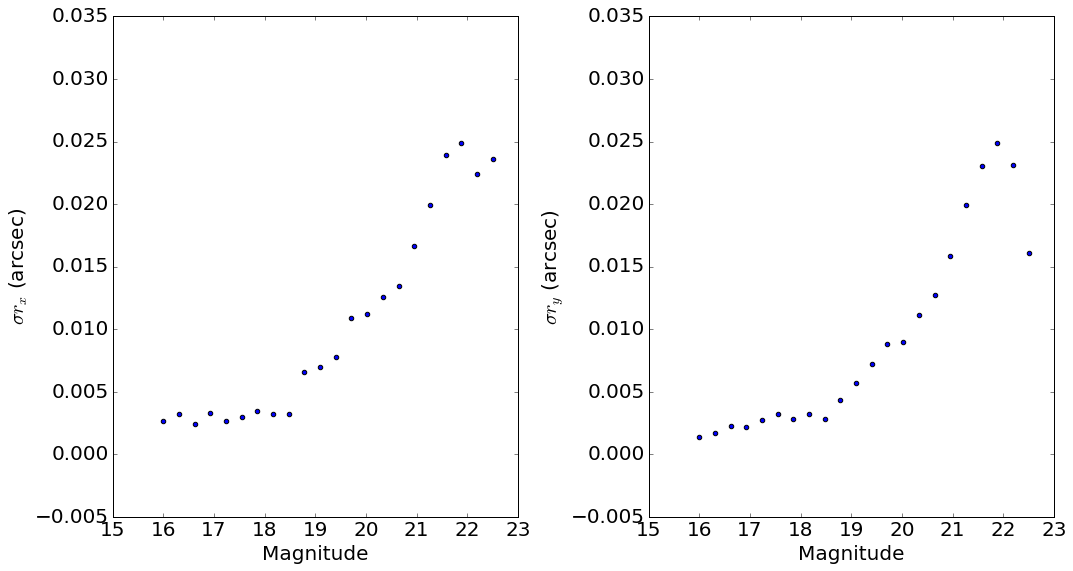

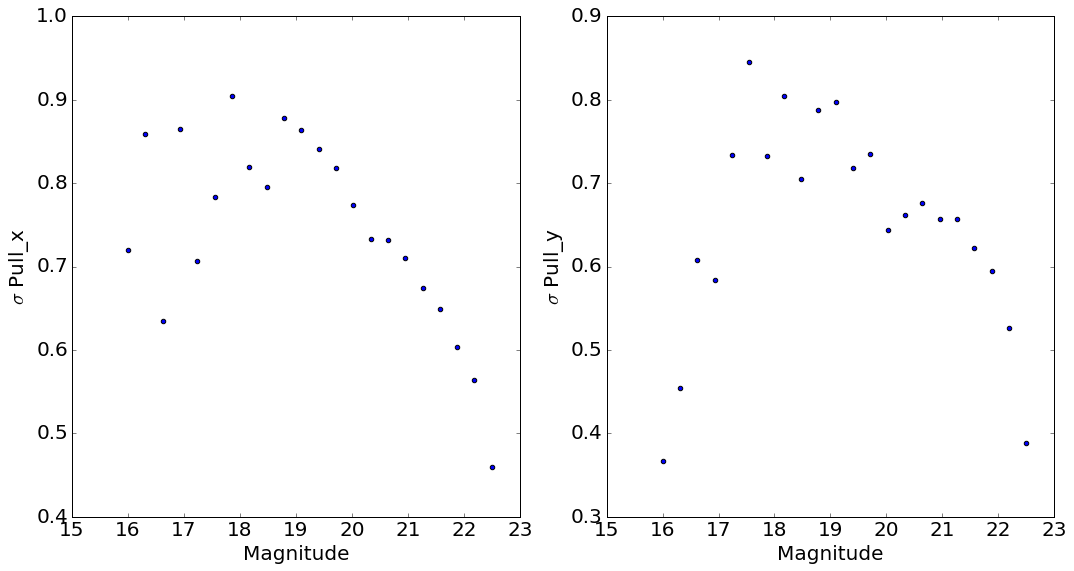

In [6]:
magMin = 16
magMax = 22.5
numStep = 22
magVal, step = numpy.linspace(magMin,magMax,num=numStep,retstep=True)

sigmaRx = []
sigmaRy = []
pullX = []
pullY = []

for m in magVal :
    idm = numpy.where( (nt['mag']>m-step/2) & (nt['mag']<=m+step/2) & (abs(3600*nt['rx'])<0.3) & (abs(3600*nt['ry'])<0.3) )
    sigmaRx.append(numpy.std(3600*nt['rx'][idm]))
    sigmaRy.append(numpy.std(3600*nt['ry'][idm]))
    pullX.append(numpy.std(nt["rx"][idm]/numpy.sqrt(nt["rvx"][idm])))
    pullY.append(numpy.std(nt["ry"][idm]/numpy.sqrt(nt["rvy"][idm])))
    
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.scatter(magVal,sigmaRx)
ax0.set_xlabel("Magnitude", fontsize=20)
ax0.set_ylabel("$\sigma r_x$ (arcsec)", fontsize=20)
ax1.scatter(magVal,sigmaRy)
ax1.set_xlabel("Magnitude", fontsize=20)
ax1.set_ylabel("$\sigma r_y$ (arcsec)", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.tick_params(labelsize=20)

fig.tight_layout()

fig, (ax2, ax3) = plt.subplots(ncols=2, figsize=(15, 8))
ax2.scatter(magVal,pullX)
ax2.set_xlabel("Magnitude", fontsize=20)
ax2.set_ylabel("$\sigma$ Pull_x", fontsize=20)
ax3.scatter(magVal,pullY)
ax3.set_xlabel("Magnitude", fontsize=20)
ax3.set_ylabel("$\sigma$ Pull_y", fontsize=20)
ax2.tick_params(labelsize=20)
ax3.tick_params(labelsize=20)

fig.tight_layout()

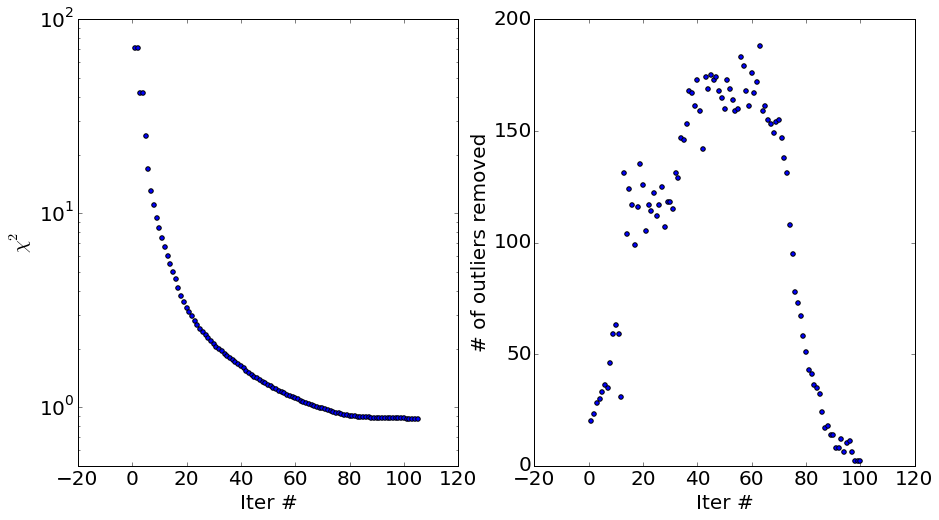

In [97]:
fname = "../simAstrom_error_000_iter_100.log"

with open(fname) as f:
    content = f.readlines()

chi2 = []
outliers = []
for line in content :
    if "Chi2/ndof" in line :
        s = line.split("=")
        chi2.append(float(s[1].rstrip()))
    if "removed" in line :
        s = line.split(" ")
        outliers.append(float(s[7]))

del chi2[0] 
x1 = numpy.linspace(1, len(chi2), num=len(chi2))
x2 = numpy.linspace(1, len(outliers), num=len(outliers))

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(15, 8))
ax0.set_yscale("log")
ax0.set_ylim([0.5,100])
ax0.scatter(x1, numpy.asarray(chi2))
ax0.set_xlabel("Iter #", fontsize=20)
ax0.set_ylabel("$\chi ^2$", fontsize=20)
ax0.tick_params(labelsize=20)
ax1.set_ylim([0., 200.])
ax1.scatter(x2.tolist(), outliers)
ax1.set_xlabel("Iter #", fontsize=20)
ax1.set_ylabel("# of outliers removed", fontsize=20)
ax1.tick_params(labelsize=20)